In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":5,
    "n_white_vehicle":0,
    "n_white_drone":0},
    "init":"random"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":0,
    "n_black_drone":0},
    "init":"random"
  }
}

In [3]:
sim = Environment(config, shape=(10,10))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

FLAGSTAFF     <plato.entity.infantry.Infantry object at 0x1165914d0>
LAGUNA        <plato.entity.infantry.Infantry object at 0x116e71e50>
IPSWICH       <plato.entity.infantry.Infantry object at 0x116e71dd0>
ECHO          <plato.entity.infantry.Infantry object at 0x116e82350>
MILWAUKEE     <plato.entity.infantry.Infantry object at 0x116e82e10>


In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x116e87550>
unknown_1     <plato.entity.infantry.Infantry object at 0x116e875d0>
unknown_2     <plato.entity.infantry.Infantry object at 0x116e87510>
unknown_3     <plato.entity.infantry.Infantry object at 0x116e89b10>
unknown_4     <plato.entity.infantry.Infantry object at 0x116e8a610>


In [7]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 10, 10)

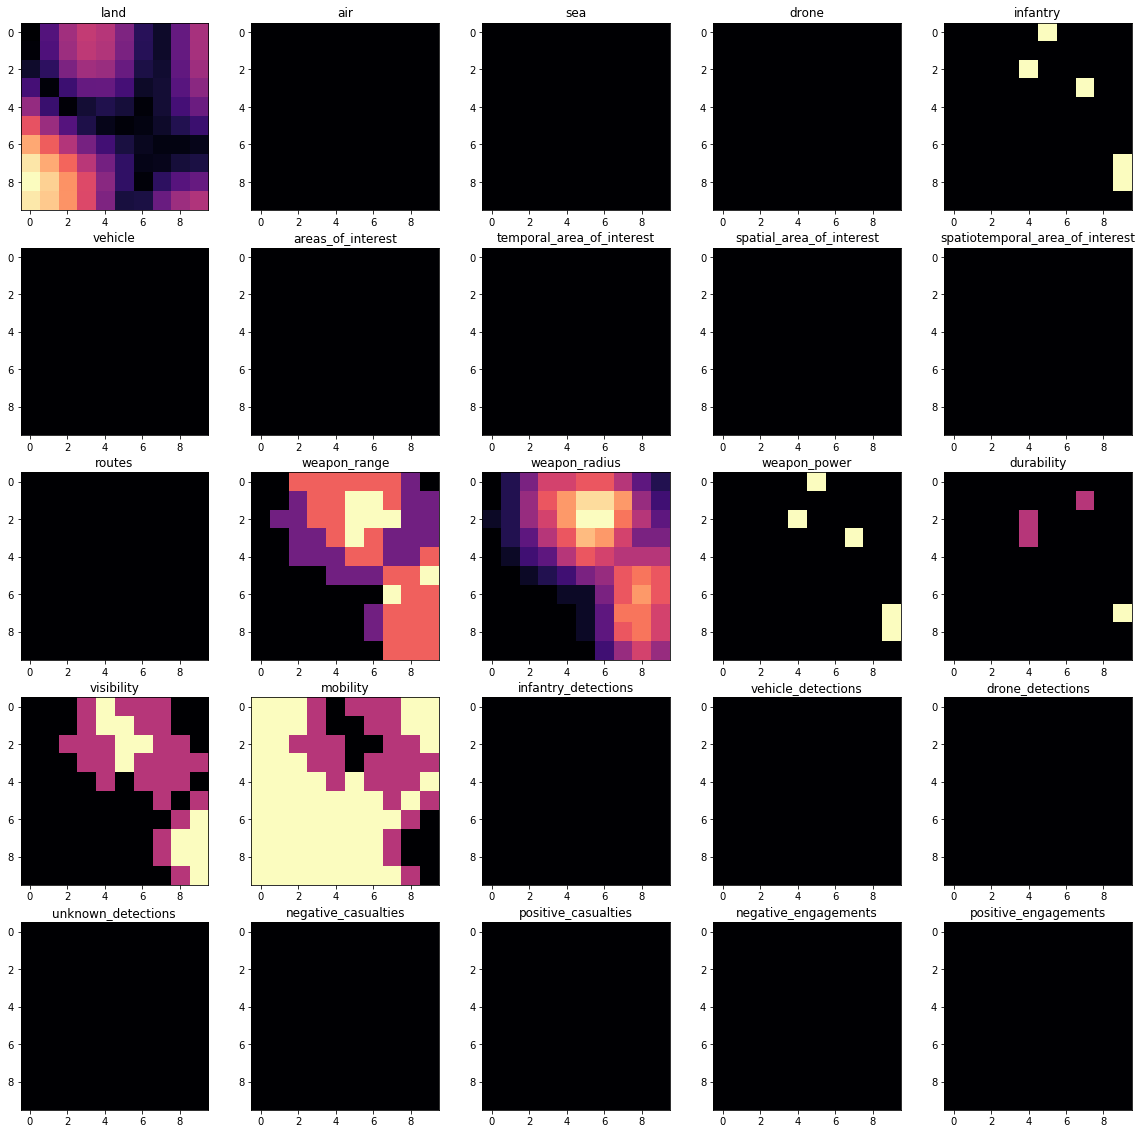

In [8]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

In [9]:
import tqdm
sim.reset()
bar = tqdm.tqdm_notebook(total=sim.time_limit)

terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
    bar.update(1)
           
print('Black Kills:')
for ent in metadata['positive_casualties']: print('\t',ent.id,ent)
print('White Kills:')
for ent in metadata['negative_casualties']: print('\t',ent.id,ent)
print('\nSparse Reward:', reward)

Black Kills:
	 NEEDLES <plato.entity.infantry.Infantry object at 0x11a0f9e50>
	 BISBEE <plato.entity.infantry.Infantry object at 0x11a10a250>
	 ANAHEIM <plato.entity.infantry.Infantry object at 0x117794c50>
	 TOKYO <plato.entity.infantry.Infantry object at 0x11a0f9890>
	 TEMPEST <plato.entity.infantry.Infantry object at 0x11a11bd50>
White Kills:
	 unknown_0 <plato.entity.infantry.Infantry object at 0x116e87290>
	 unknown_3 <plato.entity.infantry.Infantry object at 0x11a12c910>
	 unknown_2 <plato.entity.infantry.Infantry object at 0x116e87250>
	 unknown_1 <plato.entity.infantry.Infantry object at 0x116e87310>

Sparse Reward: -1
